<a href="https://colab.research.google.com/github/pafend/colab_strategies/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.

In [1]:
!pip install pandas
!pip install git+https://github.com/business-science/pytimetk.git

  Cloning https://github.com/business-science/pytimetk.git to /tmp/pip-req-build-dvrtc0r2
  Running command git clone --filter=blob:none --quiet https://github.com/business-science/pytimetk.git /tmp/pip-req-build-dvrtc0r2
  Resolved https://github.com/business-science/pytimetk.git to commit 04cecd89592d57d27e1fcd4e6f7aa4ef41f0b9da
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.7/759.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
#Import libs

import pandas as pd
import pytimetk as tk

In [25]:
# 2.0 get stock pricce data

stocks_df = tk.load_dataset("stocks_daily")
stocks_df['date'] = pd.to_datetime(stocks_df['date'])
stocks_df.head()

symbol       date       open       high        low      close    volume  \
0   META 2013-01-02  27.440001  28.180000  27.420000  28.000000  69846400   
1   META 2013-01-03  27.879999  28.469999  27.590000  27.770000  63140600   
2   META 2013-01-04  28.010000  28.930000  27.830000  28.760000  72715400   
3   META 2013-01-07  28.690001  29.790001  28.650000  29.420000  83781800   
4   META 2013-01-08  29.510000  29.600000  28.860001  29.059999  45871300   

    adjusted  
0  28.000000  
1  27.770000  
2  28.760000  
3  29.420000  
4  29.059999

In [1]:
!pip install bt

In [109]:
!pip install yfinance


In [203]:
import yfinance as yf
import pandas as pd

# List of stock symbols
symbols = ["META", "AAPL", "GOOGL", "NFLX", "CSCO", "AMD", "NVDA", "MU", "AVGO", "JPM", "GS", "CAT", "MGM", "X", "AA", "AAL"]  # You can add more stock symbols to this list

# Start and end dates for historical data
start_date = "2014-01-01"
end_date = "2024-10-10"

# Initialize an empty DataFrame to store the data
all_data = pd.DataFrame()

# Loop through each symbol and download the stock data
for symbol in symbols:
    # Download the stock data for the given symbol
    data = yf.download(symbol, start=start_date, end=end_date)

    # Reset the index to make 'Date' a column
    data.reset_index(inplace=True)

    # Add the 'symbol' column
    data['symbol'] = symbol

    # Rename columns to match the desired output
    data = data.rename(columns={
        'Date': 'date',
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'Close': 'close',
        'Adj Close': 'adjusted',
        'Volume': 'volume'
    })

    # Reorder the columns
    data = data[['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjusted']]

    # Append the data for this symbol to the all_data DataFrame
    all_data = pd.concat([all_data, data], ignore_index=True)

# Display the final DataFrame with data for all stocks
print(all_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

  symbol       date       open       high        low      close    volume  \
0   META 2014-01-02  54.830002  55.220001  54.189999  54.709999  43195500   
1   META 2014-01-03  55.020000  55.650002  54.529999  54.560001  38246200   
2   META 2014-01-06  54.419998  57.259998  54.049999  57.200001  68852600   
3   META 2014-01-07  57.700001  58.549999  57.220001  57.919998  77207400   
4   META 2014-01-08  57.599998  58.410000  57.230000  58.230000  56682400   

    adjusted  
0  54.597805  
1  54.448116  
2  57.082699  
3  57.801220  
4  58.110584  


In [204]:
# 3.0 Anomaily detection

stocks_filtered_df = stocks_df.query("date >= '2013-01-01'")
stocks_filtered_df = all_data
stocks_anomalized_df = stocks_filtered_df[['symbol','date','adjusted']].groupby('symbol').anomalize(date_column='date',value_column='adjusted', method='stl', iqr_alpha=0.10)
stocks_filtered_df[['symbol','date','adjusted']].groupby('symbol').head()


Anomalizing...:   0%|          | 0/16 [00:00<?, ?it/s]

symbol       date   adjusted
0       META 2014-01-02  54.597805
1       META 2014-01-03  54.448116
2       META 2014-01-06  57.082699
3       META 2014-01-07  57.801220
4       META 2014-01-08  58.110584
...      ...        ...        ...
40365    AAL 2014-01-02  23.907927
40366    AAL 2014-01-03  25.020359
40367    AAL 2014-01-06  25.482298
40368    AAL 2014-01-07  25.369175
40369    AAL 2014-01-08  26.047949

[80 rows x 3 columns]

In [205]:
stocks_anomalized_df[stocks_anomalized_df['anomaly'] == 'Yes']

symbol       date   observed  seasonal    seasadj      trend  remainder  \
15      META 2014-01-24  54.338337  0.202092  54.136245  59.571828  -5.435583   
16      META 2014-01-27  53.440182 -1.113790  54.553972  59.926567  -5.372595   
17      META 2014-01-28  55.026924  0.168866  54.858059  60.279316  -5.421258   
18      META 2014-01-29  53.420223 -1.312954  54.733177  60.629911  -5.896734   
412     META 2015-08-21  85.883507 -0.264361  86.147868  92.074302  -5.926434   
...      ...        ...        ...       ...        ...        ...        ...   
42627    AAL 2022-12-27  12.530000 -0.143732  12.673732  14.206596  -1.532864   
42628    AAL 2022-12-28  12.320000 -0.167913  12.487913  14.271172  -1.783259   
42629    AAL 2022-12-29  12.700000  0.035776  12.664224  14.338250  -1.674026   
42630    AAL 2022-12-30  12.720000 -0.176259  12.896259  14.407592  -1.511333   
42631    AAL 2023-01-03  12.740000 -0.159457  12.899457  14.479081  -1.579624   

      anomaly  anomaly_score  anomaly_direction  recomposed_l1  recomposed_l2  \
15        Yes       7.982652                 -1      54.666559      69.975419   
16        Yes       7.919664                 -1      53.705416      69.014276   
17        Yes       7.968327                 -1      55.340821      70.649681   
18        Yes       8.443803                 -1      54.209596      69.518456   
412       Yes       8.473503                 -1      86.702580     102.011440   
...       ...            ...                ...            ...            ...   
42627     Yes       2.242761                 -1      12.624574      16.920947   
42628     Yes       2.493155                 -1      12.664969      16.961341   
42629     Yes       2.383922                 -1      12.935736      17.232108   
42630     Yes       2.221230                 -1      12.793044      17.089416   
42631     Yes       2.289520                 -1      12.881334      17.177706   

       observed_clean  
15          56.580167  
16          55.619023  
17          57.254428  
18          56.123204  
412         88.616187  
...               ...  
42627       13.161621  
42628       13.202015  
42629       13.472782  
42630       13.330090  
42631       13.418380  

[8799 rows x 13 columns]

In [206]:
stocks_anomalized_df.groupby('symbol').plot_anomalies(date_column = "date", facet_ncol = 2,width = 1100,height = 800)

In [207]:
# prompt: please genereate a trading strategy that buy when it is an anomaly below the band and sells when it is above. the flag is called "anomaly_direction" in the existing dataframe. It has the values 1, -1 and 0, so please use this. Please also provide a backtesting library that backtests these trading results and outputs useful statistics like sharpe ratio etc. use http://pmorissette.github.io/bt

import bt

# Define the trading strategy
def my_strategy(data):
  """
  Trading strategy that buys when anomaly_direction changes from -1 to 0
  and sells when anomaly_direction changes from 0 to 1.
  """

  # Create a new column 'prev_anomaly' with shifted values
  data['prev_anomaly'] = data['anomaly_direction'].shift(1)

  # Fill the first value with 0 to avoid triggering a buy/sell signal
  data['prev_anomaly'].fillna(0, inplace=True)

  # Calculate signals based on the change from previous value
  data['signals'] = 99 # dummy signals
  data.loc[(data['anomaly_direction'] == 0) & (data['prev_anomaly'] == -1), 'signals'] = 1
  data.loc[(data['anomaly_direction'] == -1) & (data['prev_anomaly'] == 0), 'signals'] = 0
  data.loc[(data['anomaly_direction'] == 0) & (data['prev_anomaly'] == 1), 'signals'] = -1

  # Forward fill the buy signal (1) until a sell signal (-1) is encountered
  data['signals'] = data['signals'].replace(to_replace=99, method='ffill')

  # Reset dummy signals
  data['signals'] = data['signals'].replace(99, 0)

  return data['signals']


# Prepare the data for backtesting
stocks_anomalized_df['signals'] = stocks_anomalized_df.groupby('symbol').apply(my_strategy).reset_index(level=0, drop=True)

In [208]:
# prompt: DataFrame „stocks_anomalized_df“ wird verwendet: i want to transform this dataframe in a dataframe that has as columns the unique values of the symbols and then has a datetime index as well as "observed" as the values

# Pivot the dataframe to have symbols as columns and observed values as values
stocks_anomalized_df_pivot = stocks_anomalized_df.pivot(index='date', columns='symbol', values='observed')

# Reset the index to make 'date' a regular column
stocks_anomalized_df_pivot = stocks_anomalized_df_pivot.reset_index()

# Set 'date' as the index
stocks_anomalized_df_pivot = stocks_anomalized_df_pivot.set_index('date')
stocks_anomalized_df_pivot.head()

symbol             AA        AAL       AAPL   AMD      AVGO        CAT  \
date                                                                     
2014-01-02  23.744680  23.907927  17.253260  3.95  3.974313  67.283630   
2014-01-03  23.834879  25.020359  16.874279  4.00  3.989411  67.246185   
2014-01-06  23.744680  25.482298  16.966293  4.13  3.962235  66.362732   
2014-01-07  23.767227  25.369175  16.844952  4.18  3.999978  66.579857   
2014-01-08  24.421165  26.047949  16.951630  4.18  4.059612  66.737106   

symbol           CSCO      GOOGL          GS        JPM       META        MGM  \
date                                                                            
2014-01-02  15.829065  27.787050  144.011475  43.550606  54.597805  22.403788   
2014-01-03  15.814682  27.584349  145.037231  43.887287  54.448116  22.148775   
2014-01-06  15.836265  27.891897  146.030502  44.141663  57.082699  22.177111   
2014-01-07  16.052111  28.429604  145.151230  43.632908  57.801220  23.149952   
2014-01-08  16.037727  28.488766  145.273331  44.044407  58.110584  23.357748   

symbol             MU       NFLX      NVDA          X  
date                                                   
2014-01-02  21.254309  51.831429  0.374024  27.755600  
2014-01-03  20.577229  51.871429  0.369543  27.407282  
2014-01-06  20.282848  51.367142  0.374496  27.104794  
2014-01-07  21.322996  48.500000  0.380627  26.985630  
2014-01-08  23.422913  48.712856  0.385815  27.132301

In [209]:
# Pivot the signals DataFrame
signals_pivot = stocks_anomalized_df.pivot(index='date', columns='symbol', values='signals')

# Divide signals by the number of symbols
num_symbols = len(signals_pivot.columns)
signals_pivot = signals_pivot / num_symbols

In [210]:
# Create a backtest object
bt_strategy = bt.Strategy('My Anomaly Strategy', [bt.algos.WeighTarget(signals_pivot),
                                                bt.algos.Rebalance()])

# Create a backtest
bt_backtest = bt.Backtest(bt_strategy, stocks_anomalized_df_pivot)

# Run the backtest
bt_results = bt.run(bt_backtest)

100%|██████████| 1/1 [00:05<00:00,  5.32s/it]


In [211]:
signals_pivot.head()

symbol       AA     AAL  AAPL  AMD  AVGO  CAT  CSCO  GOOGL   GS  JPM  META  \
date                                                                         
2014-01-02  0.0  0.0000   0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0   0.0   
2014-01-03  0.0  0.0625   0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0   0.0   
2014-01-06  0.0  0.0625   0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0   0.0   
2014-01-07  0.0  0.0625   0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0   0.0   
2014-01-08  0.0  0.0625   0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0   0.0   

symbol      MGM   MU  NFLX  NVDA    X  
date                                   
2014-01-02  0.0  0.0   0.0   0.0  0.0  
2014-01-03  0.0  0.0   0.0   0.0  0.0  
2014-01-06  0.0  0.0   0.0   0.0  0.0  
2014-01-07  0.0  0.0   0.0   0.0  0.0  
2014-01-08  0.0  0.0   0.0   0.0  0.0

In [212]:
signals_pivot.tail()

symbol          AA     AAL    AAPL     AMD    AVGO     CAT    CSCO   GOOGL  \
date                                                                         
2024-09-05  0.0625  0.0625 -0.0625  0.0625  0.0625 -0.0625 -0.0625 -0.0625   
2024-09-06  0.0625  0.0625 -0.0625  0.0625  0.0000 -0.0625  0.0000 -0.0625   
2024-09-09  0.0625  0.0625 -0.0625  0.0625  0.0000  0.0000  0.0000 -0.0625   
2024-09-10  0.0625  0.0625  0.0000  0.0625  0.0000  0.0000  0.0000  0.0000   
2024-09-11  0.0625  0.0625  0.0625 -0.0625  0.0625  0.0625  0.0625  0.0625   

symbol       GS     JPM    META     MGM      MU    NFLX  NVDA    X  
date                                                                
2024-09-05  0.0 -0.0625 -0.0625  0.0625  0.0625 -0.0625   0.0  0.0  
2024-09-06  0.0 -0.0625  0.0000  0.0625  0.0625 -0.0625   0.0  0.0  
2024-09-09  0.0 -0.0625  0.0000  0.0625  0.0000 -0.0625   0.0  0.0  
2024-09-10  0.0 -0.0625  0.0625  0.0625  0.0625 -0.0625   0.0  0.0  
2024-09-11  0.0  0.0000  0.0625  0.0625  0.0625 -0.0625   0.0  0.0

In [213]:
# Print the results
print(bt_results)
print(bt_results.stats)

{'My Anomaly Strategy': <ffn.core.PerformanceStats object at 0x7fdc7d354ca0>}
                       My Anomaly Strategy
start                  2014-01-01 00:00:00
end                    2024-09-11 00:00:00
rf                                     0.0
total_return                     70.397511
cagr                               0.49052
max_drawdown                     -0.150666
calmar                            3.255671
mtd                               0.011572
three_month                       0.181064
six_month                         0.297152
ytd                               0.468519
one_year                          0.627469
three_year                        0.692924
five_year                         0.725232
ten_year                          0.513806
incep                              0.49052
daily_sharpe                      3.065829
daily_sortino                     5.599716
daily_mean                          0.4089
daily_vol                         0.133373
daily_skew         

<Axes: title={'center': 'Equity Progression'}>

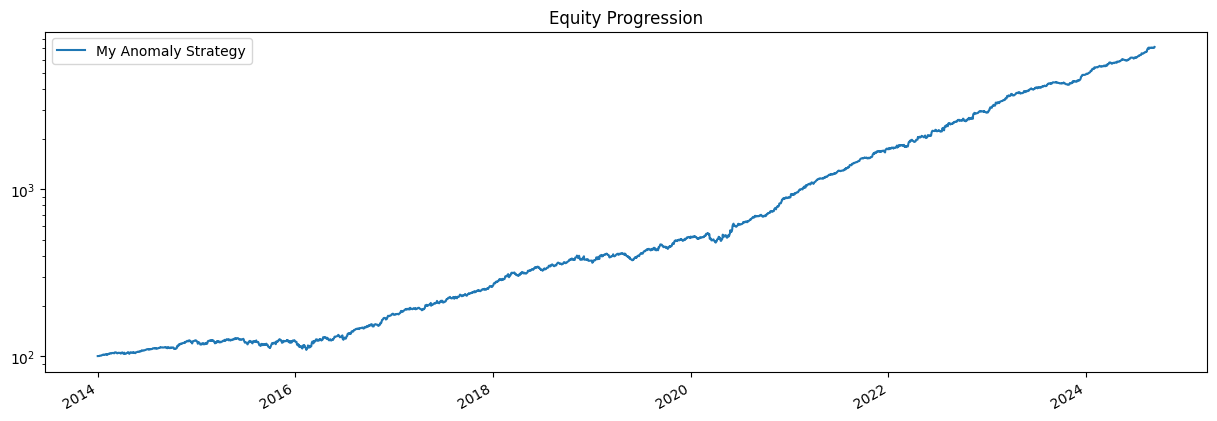

In [214]:
# Plot the results
bt_results.plot(logy=True)

In [215]:
signals_pivot.tail()

symbol          AA     AAL    AAPL     AMD    AVGO     CAT    CSCO   GOOGL  \
date                                                                         
2024-09-05  0.0625  0.0625 -0.0625  0.0625  0.0625 -0.0625 -0.0625 -0.0625   
2024-09-06  0.0625  0.0625 -0.0625  0.0625  0.0000 -0.0625  0.0000 -0.0625   
2024-09-09  0.0625  0.0625 -0.0625  0.0625  0.0000  0.0000  0.0000 -0.0625   
2024-09-10  0.0625  0.0625  0.0000  0.0625  0.0000  0.0000  0.0000  0.0000   
2024-09-11  0.0625  0.0625  0.0625 -0.0625  0.0625  0.0625  0.0625  0.0625   

symbol       GS     JPM    META     MGM      MU    NFLX  NVDA    X  
date                                                                
2024-09-05  0.0 -0.0625 -0.0625  0.0625  0.0625 -0.0625   0.0  0.0  
2024-09-06  0.0 -0.0625  0.0000  0.0625  0.0625 -0.0625   0.0  0.0  
2024-09-09  0.0 -0.0625  0.0000  0.0625  0.0000 -0.0625   0.0  0.0  
2024-09-10  0.0 -0.0625  0.0625  0.0625  0.0625 -0.0625   0.0  0.0  
2024-09-11  0.0  0.0000  0.0625  0.0625  0.0625 -0.0625   0.0  0.0